In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
#Data collection and processing
#This model will predict whether the person has Heart disease or Not. 
#Step 1:Creating the dataframe from dataset.
data = pd.read_csv('heart_disease_data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.shape

(1025, 14)

In [6]:
#Step 2:Preprocessing of Dataframes.
#getting info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
copy_df = data.copy()

In [9]:
def check_disease(x):
    if x == 0:
        return "Normal Heart"
    return "Ailing Heart"

In [10]:
copy_df["target"] = copy_df["target"].apply(check_disease)

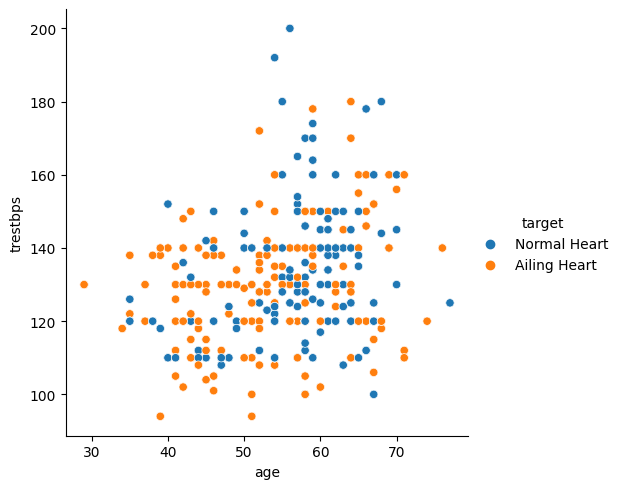

In [11]:
sns.relplot(x='age',y='trestbps',hue = 'target',data = copy_df)

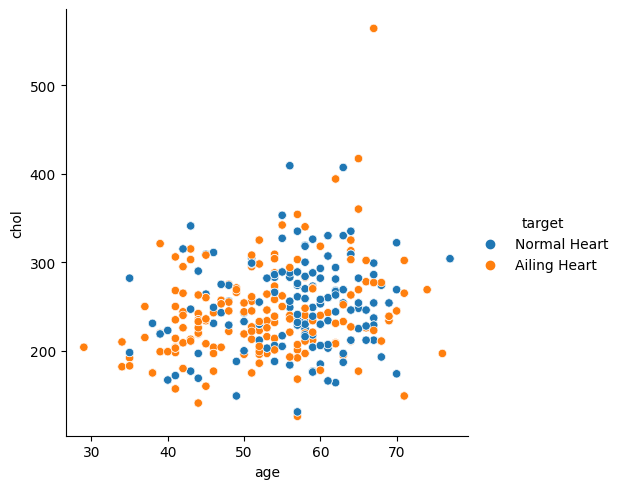

In [12]:
sns.relplot(x='age',y='chol',hue = 'target',data=copy_df)

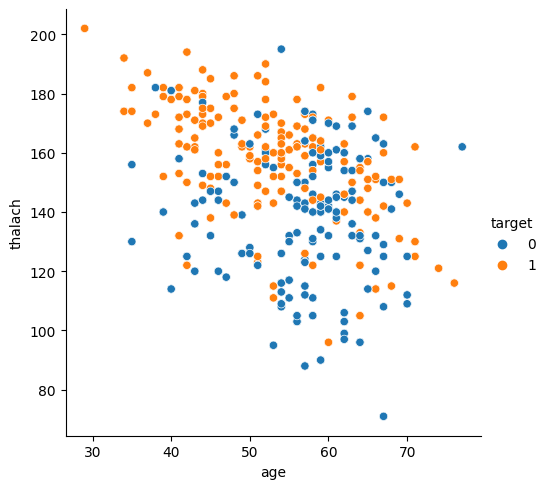

In [13]:
sns.relplot(x='age',y='thalach',hue = 'target',data=data)

C:\Users\tejas\AppData\Local\Temp\ipykernel_12448\3262849815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

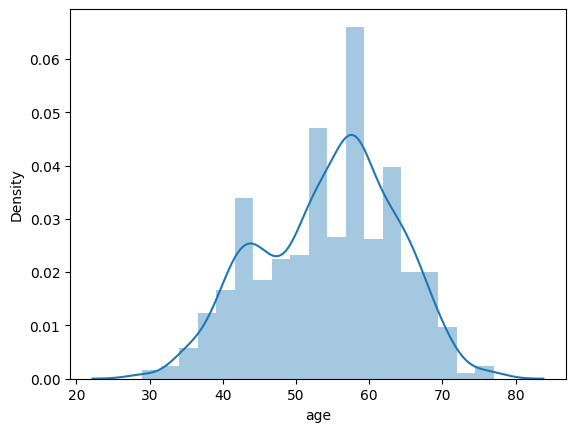

In [14]:
sns.distplot(data['age'])

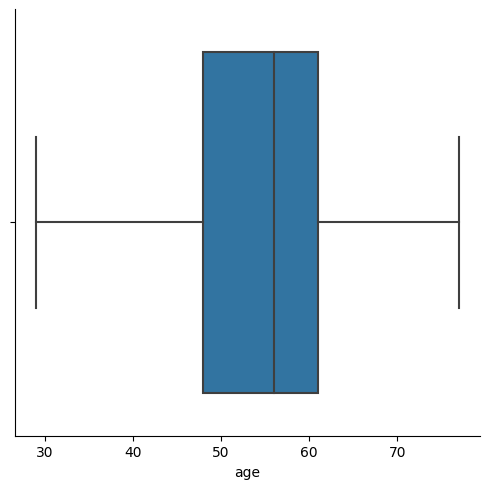

In [15]:
sns.catplot(x='age',kind='box',data=data) #The persons belongs in the range of this box.

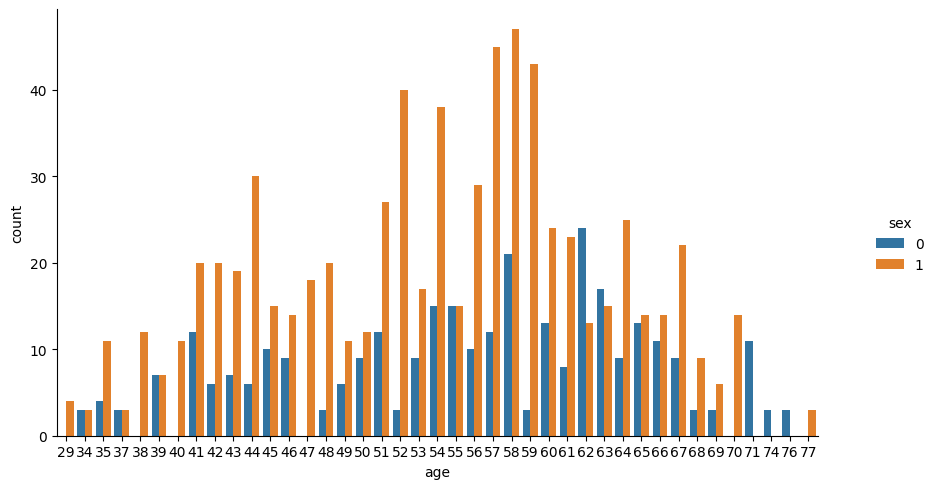

In [16]:
g = sns.catplot(x='age',hue = 'sex', kind = 'count',data= data)
g.fig.set_figwidth(10)

In [17]:
#checking the distribution of target data
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [18]:
#Step 4:Dividing the input and Output
#1 - defective heart
#0 - Healthy heart
#splitting the features and Target
x = data.drop(columns = 'target',axis = -1)
y = data['target']

In [19]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [20]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [21]:
#Step 5: Train and Test variables.
#splitting the data into training data into testing data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(1025, 13) (820, 13) (205, 13)


In [23]:
print(y.shape,y_train,y_test.shape)

(1025,) 736     0
443     1
546     0
803     0
355     1
       ..
75      1
983     1
330     1
522     1
1006    1
Name: target, Length: 820, dtype: int64 (205,)


In [24]:
#Step 7 : Running the Regressor.
#model training
model = LogisticRegression()

In [25]:
#Step 8:Fitting the model(Mapping the inputs with outputs)
#training the Logisticmodel with training data
model.fit(x_train,y_train)

c:\Users\tejas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.coef_

array([[ 0.00834566, -1.28659596,  0.81889243, -0.01269156, -0.00137053,
        -0.08764148,  0.53549523,  0.02811742, -0.89229755, -0.58439425,
         0.46472042, -0.71804576, -0.89702546]])

In [27]:
model.intercept_

array([0.03384175])

In [28]:
#model evaluation
#accuracyScore
#accuract on training data

In [29]:
#Step 9 : Predicting the output.
#Building a predictive System
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)
#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0] == 0):
  print("The Person does not has a Heart Disease")
else:
  print("The Person has Heart Disease")

[1]
The Person has Heart Disease


c:\Users\tejas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
#Step 10 : Evaluation :Accuracy score.
#accuracy on training data
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [31]:
print('Accuracy on Training data : ',training_data_accuracy)

Accuracy on Training data :  0.8548780487804878


In [32]:
#accuracy on training data
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

In [33]:
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  0.8195121951219512


In [34]:


model = Sequential()
model.add(Dense(32, input_dim=13, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
history = model.fit(x_train,y_train, epochs=10, batch_size=10,validation_data=(x_test,y_test))

Epoch 1/10
82/82 [==============================] - 2s 6ms/step - loss: 0.7884 - accuracy: 0.6354 - val_loss: 1.0506 - val_accuracy: 0.5220
Epoch 2/10
82/82 [==============================] - 0s 3ms/step - loss: 0.7367 - accuracy: 0.6122 - val_loss: 0.6452 - val_accuracy: 0.6683
Epoch 3/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6585 - val_loss: 0.6083 - val_accuracy: 0.6634
Epoch 4/10
82/82 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.6622 - val_loss: 0.5927 - val_accuracy: 0.6878
Epoch 5/10
82/82 [==============================] - 0s 3ms/step - loss: 0.6190 - accuracy: 0.6317 - val_loss: 0.6877 - val_accuracy: 0.5659
Epoch 6/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6524 - val_loss: 0.7456 - val_accuracy: 0.5707
Epoch 7/10
82/82 [==============================] - 0s 3ms/step - loss: 0.5969 - accuracy: 0.6744 - val_loss: 0.5669 - val_accuracy: 0.7122
Epoch 8/10
82/82 [==

In [36]:
#Step 9 : Predicting the output.
#Building a predictive System
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)
#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('Probability that this patient has heart disease is ',prediction[0][0]*100)


1/1 [==============================] - 0s 124ms/step
Probability that this patient has heart disease is  78.71140241622925


In [37]:
#random forest


RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(x_train,y_train)
X_test_prediction = RandomForestClassifier.predict(x_test)

print(accuracy_score(X_test_prediction,y_test))

1.0


In [38]:
#decision tree


DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(x_train,y_train)
X_test_prediction = DecisionTreeClassifier.predict(x_test)

print(accuracy_score(X_test_prediction,y_test))

1.0
